In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

In [2]:
df=pd.DataFrame(pd.read_csv('./data/NFL Play by Play 2009-2017 (v4).csv', encoding='gbk', header=0, engine='python'))

In [3]:
df.describe()

/home/xiaoyu/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,4.076880e+05,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,407244.000000,406848.000000,406848.000000,407688.000000,...,159190.000000,382734.000000,382734.000000,381101.000000,381101.000000,382679.000000,402147.000000,159187.000000,158926.000000,407688.000000
mean,2.013158e+09,12.316158,2.577412,2.002476,7.374200,1695.268944,20.576762,28.488327,48.644081,7.309403,...,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.002099,0.015135,-0.010480,2013.018985
std,2.572839e+06,7.149527,1.129750,1.006353,4.642388,1062.801012,17.969326,12.946471,25.070416,4.869987,...,1.972715,0.285574,0.285629,0.287818,0.287867,0.287445,0.045363,0.056490,0.068139,2.576962
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011101e+09,6.000000,2.000000,NaN,3.000000,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000
50%,2.013111e+09,12.000000,3.000000,NaN,7.000000,NaN,NaN,NaN,NaN,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000
75%,2.015121e+09,18.000000,4.000000,NaN,11.000000,NaN,NaN,NaN,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2017.000000


In [10]:
nomdf=pd.DataFrame(df['PlayType'])
nomdf.groupby('PlayType').size()

PlayType
End of Game             1973
Extra Point            10063
Field Goal              8928
Half End                  40
Kickoff                23403
No Play                21414
Pass                  159353
Punt                   22003
QB Kneel                3530
Quarter End             4914
Run                   120831
Sack                   10649
Spike                    640
Timeout                16206
Two Minute Warning      3741
dtype: int64

In [20]:
numdf=pd.DataFrame(df['TimeUnder'])
numdf.dropna().describe()

,TimeUnder
count,407688.000000
mean,7.374200
std,4.642388
min,0.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,15.000000


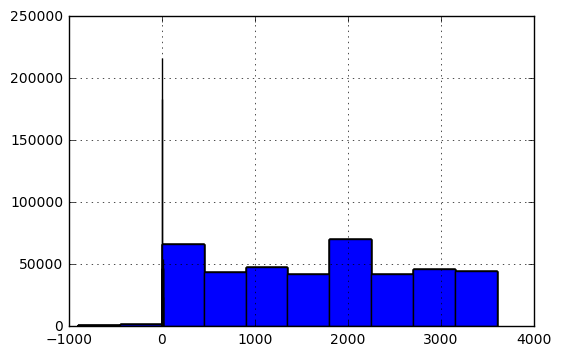

In [19]:
df['TimeUnder'].hist().get_figure()

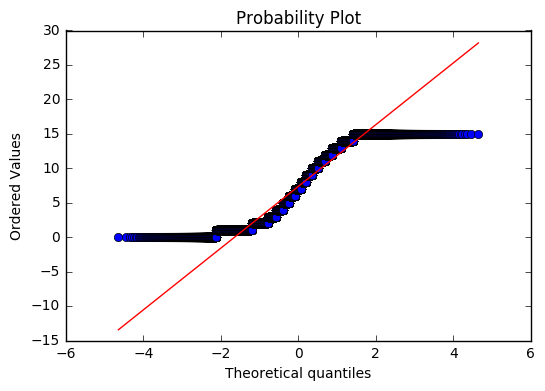

In [24]:
stats.probplot(df['TimeUnder'], dist='norm', plot=pylab)
pylab.show()

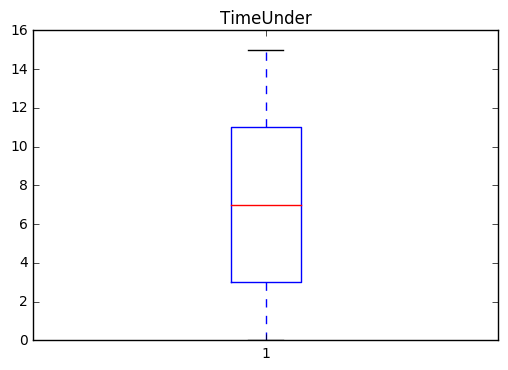

In [25]:
plt.boxplot(df['TimeUnder'].dropna())
plt.title('TimeUnder')
plt.show()

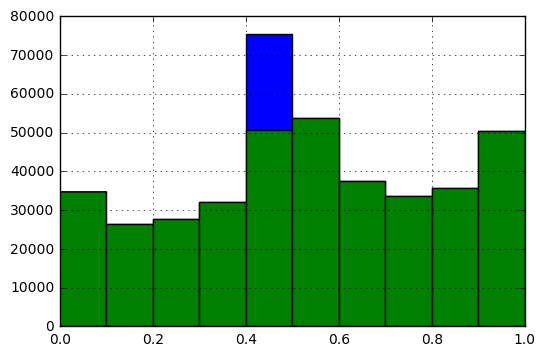

In [53]:
plt.clf()
mode=df['Home_WP_pre'].mode()[0]
df['Home_WP_pre'].fillna(mode).hist().get_figure()
df['Home_WP_pre'].dropna().hist().get_figure()

In [54]:
df.corr()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
GameID,1.000000,-0.016707,0.000594,-0.003281,-0.007028,-0.002367,-0.008588,0.015798,0.012117,0.003913,...,0.009372,0.016175,-0.016305,0.015885,-0.016027,-0.005436,0.000220,0.001547,0.003619,0.997954
Drive,-0.016707,1.000000,0.917050,-0.006638,-0.249329,-0.942744,-0.090384,0.009593,-0.030920,-0.022904,...,-0.028647,0.037824,-0.034839,0.037030,-0.034399,-0.040265,-0.014801,0.037867,-0.041260,-0.016706
qtr,0.000594,0.917050,1.000000,0.009883,-0.032128,-0.964949,-0.055985,0.001363,-0.048339,-0.013548,...,-0.026846,0.035767,-0.032358,0.035109,-0.032080,-0.032025,-0.007070,0.042343,-0.040791,0.000821
down,-0.003281,-0.006638,0.009883,1.000000,-0.021469,-0.015410,0.021489,0.003971,-0.049604,-0.245346,...,-0.108199,0.000630,-0.000630,0.000932,-0.000932,-0.033431,0.070835,0.099417,-0.079714,-0.003335
TimeUnder,-0.007028,-0.249329,-0.032128,-0.021469,1.000000,0.292694,0.100377,0.015908,0.132188,0.089984,...,0.019319,-0.012257,0.011933,-0.011756,0.011639,0.020808,0.025833,-0.031915,0.035432,-0.007016
TimeSecs,-0.002367,-0.942744,-0.964949,-0.015410,0.292694,1.000000,0.078465,0.003001,0.080470,0.035006,...,0.031068,-0.037508,0.034157,-0.036752,0.033814,0.036060,0.013594,-0.048967,0.048516,-0.002583
PlayTimeDiff,-0.008588,-0.090384,-0.055985,0.021489,0.100377,0.078465,1.000000,0.080697,-0.021641,0.062354,...,-0.002033,0.002510,-0.001973,0.002634,-0.002159,0.099937,-0.006084,-0.014904,0.009906,-0.008696
yrdln,0.015798,0.009593,0.001363,0.003971,0.015908,0.003001,0.080697,1.000000,0.175908,0.081704,...,0.042222,-0.006678,0.006696,-0.006027,0.006011,-0.025259,-0.027847,-0.095303,0.044320,0.015587
yrdline100,0.012117,-0.030920,-0.048339,-0.049604,0.132188,0.080470,-0.021641,0.175908,1.000000,0.389300,...,0.081635,-0.007565,0.006284,-0.007476,0.006326,-0.165015,0.023448,-0.063400,0.066892,0.012244
ydstogo,0.003913,-0.022904,-0.013548,-0.245346,0.089984,0.035006,0.062354,0.081704,0.389300,1.000000,...,0.055432,-0.003949,0.001293,-0.003825,0.001472,-0.025620,-0.003184,-0.072802,0.040947,0.004165
